The Problem: Image Classification
We are tackling the challenge of classifying images of dogs by their emotional expressions: happy, sad, angry, and relaxed. Each image captures a range of canine facial cues and body language that correspond to these emotions. The goal is to accurately assign one of these labels to each image, enabling us to understand and better respond to the emotional states of dogs. This classification task not only aids in enhancing human-dog interactions but also serves as a stepping stone towards more empathetic and responsive pet care systems.

# Importing Libraries

In [1]:

import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score,recall_score
from sklearn.metrics import classification_report
from zipfile import ZipFile
from sklearn.model_selection import RandomizedSearchCV


In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Kaggle Package Installation

In [3]:
!pip install -q kaggle

In [4]:
# upload json file into colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"randfahad","key":"22b326183c22a2c4b06c0fb3fa421029"}'}

In [5]:
 #Make a directory named “.kaggle”
!mkdir ~/.kaggle

In [6]:
 #Copy the “kaggle.json” into this new directory
 ! cp kaggle.json ~/.kaggle/

In [7]:
 #Allocate the required permission for this file.
 ! chmod 600 ~/.kaggle/kaggle.json


In [8]:
# Download the dog-emotions-prediction dataset
! kaggle datasets download  devzohaib/dog-emotions-prediction

 99% 374M/379M [00:05<00:00, 45.1MB/s]
100% 379M/379M [00:05<00:00, 72.6MB/s]


In [9]:
# unzip the dataset
!unzip dog-emotions-prediction.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/relaxed/7589753254_ee8544b568_b.jpg  
  inflating: images/relaxed/759543680_39c2ae5902_b.jpg  
  inflating: images/relaxed/7609431744_595047309c_b.jpg  
  inflating: images/relaxed/7613797848_52b6e2a4ac_b.jpg  
  inflating: images/relaxed/7618277504_12a9e58577_b.jpg  
  inflating: images/relaxed/7623026172_ee5fc5af84_b.jpg  
  inflating: images/relaxed/7623956526_5c55bfee35_b.jpg  
  inflating: images/relaxed/7630905134_0993274875_b.jpg  
  inflating: images/relaxed/7650586470_bab16e618f_b.jpg  
  inflating: images/relaxed/7650586740_f0a1e71f48_b.jpg  
  inflating: images/relaxed/7650587218_e8b69b8453_b.jpg  
  inflating: images/relaxed/7653104926_b172a2fc23_b.jpg  
  inflating: images/relaxed/7654628694_ca31b3633d_b.jpg  
  inflating: images/relaxed/7655545926_1288ab5e93_b.jpg  
  inflating: images/relaxed/7659667864_2b1d26a896_b.jpg  
  inflating: images/relaxed/7662075476_bc5b0b0ddf_b.jpg  
  inflating: images/re

# Title: Data Loading and Preprocessing
 This section of the code is responsible for loading image data, resizing it, and preparing it for model training.

In [10]:
""
Categories=['angry','happy','relaxed','sad']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/images'
#path which contains all the categories of images
x=0
for i in Categories:
    x=0
    print(f'loading... class : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(100,100,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
        if x>1000:
          break
        x=x+1
    print(f'loaded category:{i} Done')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

loading... class : angry
loaded category:angry Done
loading... class : happy
loaded category:happy Done
loading... class : relaxed
loaded category:relaxed Done
loading... class : sad
loaded category:sad Done


In [11]:

#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(4008, 30001)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,Target
0,0.202605,0.135435,0.069930,0.188361,0.121758,0.078378,0.149822,0.089844,0.056776,0.156557,...,0.873435,0.866278,0.828598,0.871618,0.857407,0.821506,0.865502,0.846475,0.811670,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.252999,0.104010,0.082437,0.252173,0.103183,0.081610,0.251917,0.102927,0.081354,0
2,0.992157,1.000000,0.832043,0.992405,0.999993,0.848566,0.996205,0.999116,0.877506,0.999152,...,0.677923,0.000527,0.138161,0.690662,0.001295,0.146198,0.691181,0.000479,0.145283,0
3,0.370701,0.370701,0.370701,0.365674,0.365674,0.365674,0.361241,0.361241,0.361241,0.361410,...,0.572732,0.572732,0.572732,0.488492,0.488492,0.488492,0.405017,0.405017,0.405017,0
4,0.304354,0.292589,0.233765,0.300841,0.289076,0.230253,0.301049,0.289284,0.230461,0.301785,...,0.804414,0.789137,0.758755,0.808806,0.783433,0.761984,0.799018,0.766165,0.748932,0


In [13]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,Target
4003,6.433895e-01,6.394679e-01,0.631625,6.286586e-01,0.624737,0.616894,6.595090e-01,0.655587,0.647744,0.694829,...,0.634874,0.634892,0.591768,0.656859,0.658940,0.607779,0.680334,6.842098e-01,0.627446,3
4004,7.900196e-01,7.900196e-01,0.790020,7.999213e-01,0.799921,0.799921,8.045806e-01,0.804581,0.804581,0.814702,...,0.950965,0.950965,0.950965,0.952942,0.952942,0.952942,0.953097,9.530965e-01,0.953097,3
4005,4.389259e-01,4.389259e-01,0.438926,4.467252e-01,0.446725,0.446725,4.509863e-01,0.450986,0.450986,0.452150,...,0.367940,0.367940,0.367940,0.497218,0.497218,0.497218,0.432356,4.323557e-01,0.432356,3
4006,3.850741e-12,6.159713e-08,0.005890,1.611585e-08,0.000127,0.008077,2.508513e-07,0.002343,0.012510,0.000014,...,0.009107,0.000136,0.000444,0.004979,0.000017,0.000197,0.000601,1.023446e-07,0.001956,3
4007,3.818508e-01,3.818508e-01,0.381851,4.030044e-01,0.403004,0.403004,4.301048e-01,0.430105,0.430105,0.454907,...,0.114685,0.114685,0.114685,0.126442,0.126442,0.126442,0.115570,1.155700e-01,0.115570,3


In [14]:
#input data
images=df.iloc[:,:-1]
#output data
labels=df.iloc[:,-1]

In [15]:
print(images)

             0             1         2             3         4         5      \
0     2.026050e-01  1.354348e-01  0.069930  1.883607e-01  0.121758  0.078378   
1     1.000000e+00  1.000000e+00  1.000000  1.000000e+00  1.000000  1.000000   
2     9.921569e-01  1.000000e+00  0.832043  9.924053e-01  0.999993  0.848566   
3     3.707005e-01  3.707005e-01  0.370701  3.656737e-01  0.365674  0.365674   
4     3.043537e-01  2.925890e-01  0.233765  3.008412e-01  0.289076  0.230253   
...            ...           ...       ...           ...       ...       ...   
4003  6.433895e-01  6.394679e-01  0.631625  6.286586e-01  0.624737  0.616894   
4004  7.900196e-01  7.900196e-01  0.790020  7.999213e-01  0.799921  0.799921   
4005  4.389259e-01  4.389259e-01  0.438926  4.467252e-01  0.446725  0.446725   
4006  3.850741e-12  6.159713e-08  0.005890  1.611585e-08  0.000127  0.008077   
4007  3.818508e-01  3.818508e-01  0.381851  4.030044e-01  0.403004  0.403004   

             6         7         8     

In [16]:
print(labels)

0       0
1       0
2       0
3       0
4       0
       ..
4003    3
4004    3
4005    3
4006    3
4007    3
Name: Target, Length: 4008, dtype: int64


# Data Splitting - Training and Testing Sets
The test_size parameter specifies the proportion of the dataset that will be used for testing. In this case, it's set to 0.20, meaning 20% of the data will be reserved for testing, and the remaining 80% will be used for training.


In [17]:

# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.20,
                                               random_state=42,
                                               stratify=labels)


 # Random Forest Classifier Evaluation

In this section of code, a Random Forest classifier is created and evaluated for different numbers of trees (n_estimators). The Random Forest classifier is a popular ensemble learning algorithm. Ensemble learning involves training multiple models and combining their predictions to improve overall performance.

The code iterates through a list of specified numbers of trees (5, 10, 15, and 20), training the Random Forest classifier for each configuration. Key evaluation metrics such as accuracy, precision, and recall are calculated for both the training and test datasets. These metrics provide insights into the model's overall correctness, precision of positive predictions, and ability to capture relevant instances, respectively.

The results are stored in lists, including train_accuracies, test_accuracies, train_precisions, test_precisions, train_recalls, and test_recalls. These lists capture the performance of the Random Forest classifier across different numbers of trees, enabling an analysis of how the model's accuracy, precision, and recall vary with the complexity of the ensemble.

In [18]:

# Create a Random Forest classifier
RandomForest = RandomForestClassifier()

# Initialize empty lists to store accuracies
train_accuracies = []
test_accuracies = []
# Initialize empty lists to store precisions
train_precisions = []
test_precisions = []
# Initialize empty lists to store recalls
train_recalls = []
test_recalls = []

# Train the classifier for different numbers of trees n_estimators
num_trees = [5, 10, 15,20]
for n in num_trees:
    # Set the number of trees in the classifier
    RandomForest.set_params(n_estimators=n,n_jobs=-1)

    # Train the classifier
    RandomForest.fit(x_train,y_train)

    # Predict the labels for training and test data
    y_train_pred = RandomForest.predict(x_train)
    y_test_pred = RandomForest.predict(x_test)

    # Calculate the accuracy for training and test data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Calculate the prec for training and test data
    train_precision=precision_score(y_train, y_train_pred,average='micro')
    test_precision=precision_score(y_test, y_test_pred,average='micro')
    # Calculate the recall for training and test data
    train_recall=recall_score(y_train, y_train_pred,average='micro')
    test_recall=recall_score(y_test, y_test_pred,average='micro')

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    train_precisions.append(train_precision)
    test_precisions.append(test_precision)


    train_recalls.append(train_recall)
    test_recalls .append(test_recall)






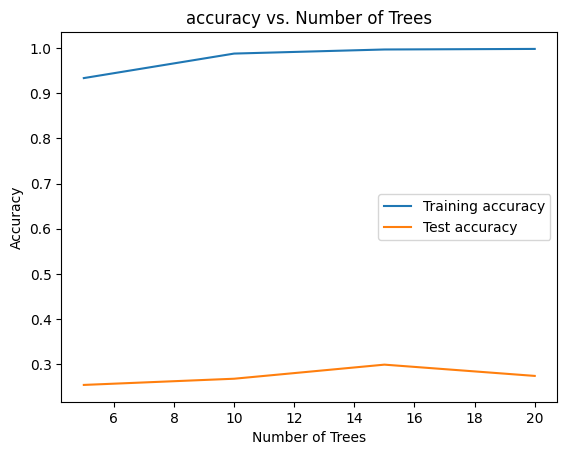

In [19]:
# Plot the accuracy graph
plt.plot(num_trees, train_accuracies, label='Training accuracy')
plt.plot(num_trees, test_accuracies, label='Test accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('accuracy vs. Number of Trees')
plt.legend()
plt.show()

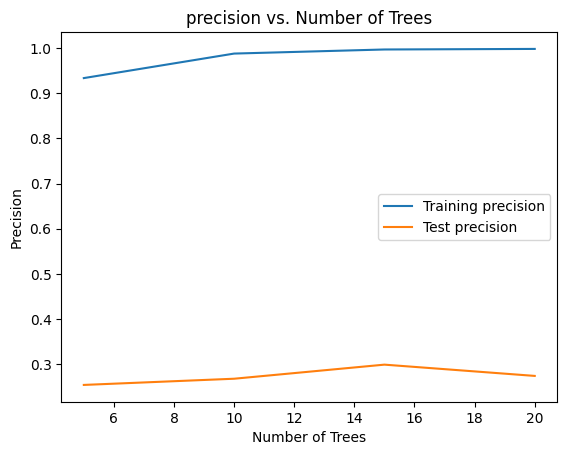

In [20]:
# Plot the accuracy graph
plt.plot(num_trees, train_precisions, label='Training precision')
plt.plot(num_trees, test_precisions, label='Test precision')
plt.xlabel('Number of Trees')
plt.ylabel('Precision')
plt.title('precision vs. Number of Trees')
plt.legend()
plt.show()

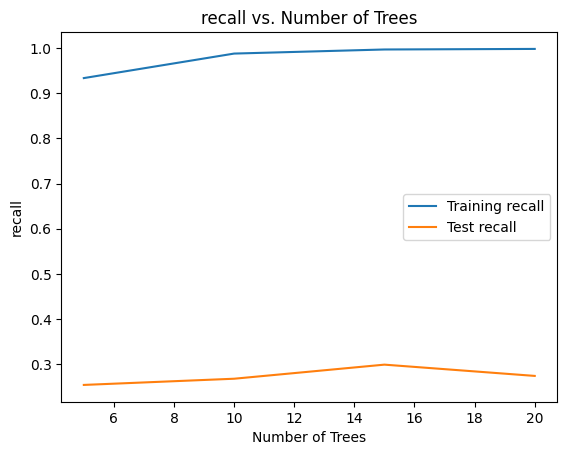

In [21]:
# Plot the accuracy graph
plt.plot(num_trees, train_recalls, label='Training recall')
plt.plot(num_trees, test_recalls, label='Test recall')
plt.xlabel('Number of Trees')
plt.ylabel('recall')
plt.title('recall vs. Number of Trees')
plt.legend()
plt.show()

These predictions can be further utilized for evaluating the performance of the Random Forest model on unseen data
his step is crucial in assessing how well the trained model generalizes to new, unseen data:

In [22]:
y_test_pred  = RandomForest.predict(x_test)


#  Classification Report for Random Forest Model Evaluation

In [23]:
print(classification_report(y_test, y_test_pred, target_names=['angry','happy','relaxed','sad']))


              precision    recall  f1-score   support

       angry       0.25      0.28      0.27       201
       happy       0.28      0.31      0.30       200
     relaxed       0.28      0.25      0.26       201
         sad       0.29      0.26      0.27       200

    accuracy                           0.27       802
   macro avg       0.28      0.27      0.27       802
weighted avg       0.28      0.27      0.27       802



In [24]:
con=confusion_matrix(y_test, y_test_pred)
print(con)

[[57 55 49 40]
 [65 62 30 43]
 [48 59 50 44]
 [57 44 48 51]]


In [25]:
# print the scores on training and test set
print('Training set score: {:.2f}'.format((RandomForest.score(x_train, y_train))*100))
print('Test set score: {:.2f}'.format((RandomForest.score(x_test, y_test))*100))

Training set score: 99.81
Test set score: 27.43


# Hyperparameter Tuning for Random Forest Classifier

Grid search with cross-validation is performed to find optimal hyperparameters (number of trees and max depth).
The code iterates through hyperparameter combinations, fits models, and evaluates performance.
Evaluation metrics (accuracy, precision, recall, F1 score) for each combination are printed.
The best hyperparameters based on accuracy are identified, and the best estimator is obtained.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
}

# Create a Random Forest classifier
RandomForest_Tuning = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForest_Tuning, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print every combination and their evaluation metrics
for param_combination, test_score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    # Create a new Random Forest classifier with the current hyperparameters
    rf = RandomForestClassifier(**param_combination)

    # Fit the model
    rf.fit(x_train, y_train)

    # Predict the labels for the test set
    y_pred = rf.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass

    # Print the metrics for the current combination
    print("Hyperparameters:", param_combination)
    print("Test Score:", test_score)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")

# Get the best estimator and its hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best combination based on accuracy
print("Best Hyperparameters (based on accuracy):", best_params)


Hyperparameters: {'max_depth': 5, 'n_estimators': 100}
Test Score: 0.30349094337605276
Accuracy: 0.29800498753117205
Precision: 0.2962392243864076
Recall: 0.29800498753117205
F1 Score: 0.2827272290741059


Hyperparameters: {'max_depth': 5, 'n_estimators': 200}
Test Score: 0.295689173361327
Accuracy: 0.29301745635910226
Precision: 0.29048155328653213
Recall: 0.29301745635910226
F1 Score: 0.27969302815517866


Hyperparameters: {'max_depth': 5, 'n_estimators': 300}
Test Score: 0.2997395035988356
Accuracy: 0.2817955112219451
Precision: 0.27584485117110535
Recall: 0.2817955112219451
F1 Score: 0.26784470063121846


Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Test Score: 0.29849096767609024
Accuracy: 0.30174563591022446
Precision: 0.3009122749412361
Recall: 0.30174563591022446
F1 Score: 0.29786709062198746


Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Test Score: 0.303798581849816
Accuracy: 0.29052369077306733
Precision: 0.2903989587167414
Recall: 0.29052369077306733
F

In [27]:
# print the scores on training and test set
print('Training set score: {:.2f}'.format((best_rf.score(x_train, y_train))*100))
print('Test set score: {:.2f}'.format((best_rf.score(x_test, y_test))*100))

Training set score: 99.84
Test set score: 29.55


Note: the above results show that we might have an overfitting problem

 # Final Evaluation with Retrained Random Forest Model

The Random Forest model is retrained using the best hyperparameters obtained from the earlier grid search. The model is then evaluated on the test dataset to assess its performance on unseen data.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Best hyperparameters obtained from grid search
best_params = {'n_estimators': 200, 'max_depth': 15}

# Create a Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)

# Retrain the model on the entire training dataset
best_rf.fit(x_train, y_train)

# Predict the labels for the test set
y_pred = best_rf.predict(x_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass

# Print the metrics for the retrained model
print("Retrained Model Metrics:")
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Retrained Model Metrics:
Best Hyperparameters: {'n_estimators': 200, 'max_depth': 15}
Accuracy: 0.31546134663341646
Precision: 0.31268112463890085
Recall: 0.31546134663341646
F1 Score: 0.3121861002801854


# Saving Random Forest Model

In [30]:
import pickle

# Load the saved model
#with open('/content/drive/MyDrive/ML_Training_Details/checkpoint.pkl', 'rb') as file:
with open('/content/drive/MyDrive/checkpoint2.pkl', 'rb') as file:

    model = pickle.load(file)

This process allows us to reuse of a pre-trained model without the need to retrain it each time, providing efficiency and convenience in deploying the model for predictions on new data.

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# Calculate precision
precision = precision_score(y_test, y_pred,average='micro')

# Calculate recall
recall = recall_score(y_test, y_pred,average='micro')

# Calculate F1 score
f1 = f1_score(y_test, y_pred,average='micro')



# Evaluation Metrics Calculation

In [33]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.31546134663341646
Recall: 0.31546134663341646
F1 Score: 0.31546134663341646


In [35]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_matrix_data = confusion_matrix(y_test, y_pred)

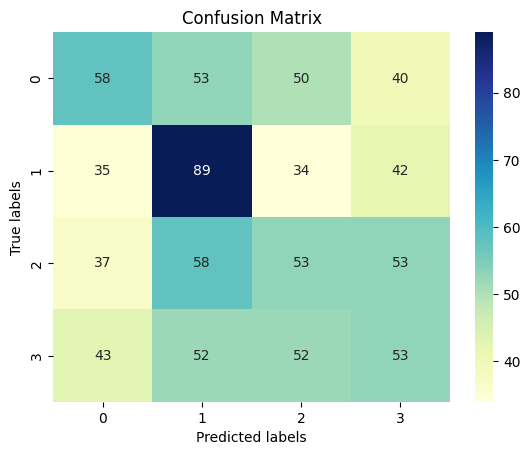

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap plot of the confusion matrix
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="YlGnBu")

# Add labels, title, and axis ticks
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

 # ROC Curve Visualization for Multiclass Classification

The ROC (Receiver Operating Characteristic) curves are plotted for each class in a multiclass classification scenario. This visualization helps assess the model's ability to distinguish between different classes by examining the trade-off between true positive rate and false positive rate across different probability thresholds.

In [40]:
!pip install plotly  # Install the plotly library if you haven't already

import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_probs are your true labels and predicted probabilities, respectively
y_probs = best_rf.predict_proba(x_test)

# Plot ROC curve for each class
fig = go.Figure()

# Calculate ROC curve and ROC area for each class
for i in range(y_probs.shape[1]):
    fpr, tpr, _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc = auc(fpr, tpr)

    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'Class {i} (AUC = {roc_auc:.2f})'))

fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    showlegend=True
)

fig.show()


In [41]:
checkpoint_path = '/content/drive/MyDrive/checkpoint2.pkl'

# File Path for Model Checkpoint

In [43]:
import pickle

# Save the model and relevant information
with open(checkpoint_path, 'wb') as file:
    pickle.dump(best_rf,file)